## Autoencoder to sample the age distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim 
from torchvision import datasets, transforms

### Extracting data 

In [2]:
data = pd.read_excel('age_data.xlsx')

In [3]:
data[:20]['Unnamed: 4'][12]

'Suggested citation: United Nations, Department of Economic and Social Affairs, Population Division (2024).\n\tWorld Population Prospects 2024, Online Edition.'

In [4]:
data.columns = [data[f'Unnamed: {i}'][15]for i in range(32)]

In [5]:
data.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year', '0-4', '5-9', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+'],
      dtype='object')

In [6]:
data = data[15::]

In [7]:
data

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
15,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
16,1,Estimates,World,NaN,900,NaN,NaN,1,World,0,...,84810.2435,70169.8575,52277.0795,36002.3945,22005.951,10799.1055,4049.087,1010.136,160.347,14.593
17,2,Estimates,World,NaN,900,NaN,NaN,1,World,0,...,86649.7785,70795.911,53158.673,36425.648,22292.1835,10814.261,4021.9485,1008.231,153.134,14.9565
18,3,Estimates,World,NaN,900,NaN,NaN,1,World,0,...,88670.7395,71386.4255,54251.183,36941.9155,22538.043,10893.917,4009.361,1003.6405,151.8765,15.411
19,4,Estimates,World,NaN,900,NaN,NaN,1,World,0,...,90752.969,72028.5805,55578.4835,37587.1765,22775.071,11047.277,4010.387,1004.0725,150.944,15.4325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21994,21979,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876,Country/Area,957,...,0.715,0.6065,0.4895,0.4145,0.24,0.1795,0.066,0.021,0.0045,0
21995,21980,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876,Country/Area,957,...,0.709,0.6165,0.5,0.4135,0.256,0.1905,0.0735,0.0225,0.005,0
21996,21981,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876,Country/Area,957,...,0.694,0.6345,0.5045,0.4125,0.281,0.1935,0.0835,0.0225,0.006,0
21997,21982,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876,Country/Area,957,...,0.681,0.66,0.504,0.422,0.304,0.187,0.0935,0.024,0.006,0


In [8]:
dict_distr = {}
for index in data.index:
    if data['Type'][index] == 'Country/Area':
        dict_distr[data['Region, subregion, country or area *'][index]] = {name: data[name][index] for name in data.columns[11::]}

In [9]:
for key in dict_distr.keys():
    dict_distr[key]['75-100'] = sum([dict_distr[key][name] for name in data.columns[26::]])

In [10]:
for name in dict_distr.keys():
    for key in data.columns[26::]:
        del dict_distr[name][key]

In [11]:
brackets = list(data.columns[11:26:]) + ['75-100']

In [12]:
for key in dict_distr.keys():
    dict_distr[key] = {name: dict_distr[key][name] / sum([dict_distr[key][name] for name in brackets]) for name in brackets}

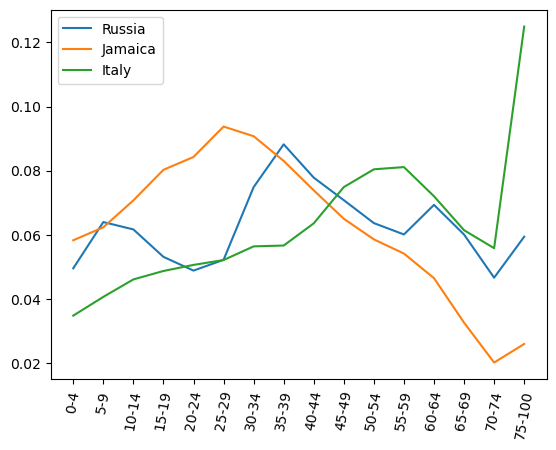

In [13]:
plt.plot([dict_distr['Russian Federation'][name] for name in brackets], label='Russia')
plt.plot([dict_distr['Jamaica'][name] for name in brackets], label='Jamaica')
plt.plot([dict_distr['Italy'][name] for name in brackets], label='Italy')
plt.xticks(ticks=[i for i in range(16)], labels=brackets, rotation=80)
plt.legend()
plt.show()

In [14]:
names = [key for key in dict_distr.keys()]

In [15]:
african_countries = [
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    'Mayotte',
    'Mozambique',
    'Réunion',
    'Rwanda',
    'Seychelles',
    'Somalia',
    'South Sudan',
    'Uganda',
    'United Republic of Tanzania',
    'Zambia',
    'Zimbabwe',
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo',
    'Democratic Republic of the Congo',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe',
    'Algeria',
    'Egypt',
    'Libya',
    'Morocco',
    'Sudan',
    'Tunisia',
    'Western Sahara',
    'Botswana',
    'Eswatini',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Benin',
    'Burkina Faso',
    'Cabo Verde',
    "Côte d'Ivoire",
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Saint Helena',
    'Senegal',
    'Sierra Leone',
    'Togo'
]

In [16]:
new_names = [name for name in names if name not in african_countries]

### Trainig (not the architecture actually used for sampling, just for illustration)

In [17]:
transform = transforms.ToTensor()

In [18]:
transform = transforms.ToTensor()
learn_dict = {key: transform(np.array([dict_distr[key][name] for name in brackets]).reshape(1, 16)) for key in dict_distr.keys()}

In [19]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(1 * 16, 1 * 10),
            nn.ReLU(),
            nn.Linear(1 * 10, 1 * 4), 
            nn.ReLU(),
            nn.Linear(1 * 4, 1 * 1)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(1 * 1, 1 * 4),
            nn.ReLU(),
            nn.Linear(1 * 4, 1 * 10),
            nn.ReLU(),
            nn.Linear(1 * 10, 1 * 16),
            nn.ReLU()
        )
        
    def encode(self, x):
        return self.encoder(x)

    def decode(self, y):
        return nn.functional.normalize(input=self.decoder(y)[0], p=1)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = nn.functional.normalize(input=self.decoder(encoded)[0], p=1)
        return decoded

In [34]:
model = Autoencoder()
model.double()
criterion = nn.L1Loss()

In [35]:
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [36]:
num_epochs = 300
outputs = []
for epoch in range(num_epochs):
    loss_arr = []
    for name in new_names[:160]:
        img = learn_dict[name]
        recon = model.forward(img).reshape(1, 1, 16)
        loss = criterion(100 * recon, 100 * img)
        loss_arr.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_avg = np.mean(loss_arr)

    loss_arr = []
    for name in new_names[160:]:
        img = learn_dict[name]
        recon = model.forward(img).reshape(1, 1, 16)
        loss = criterion(100 * recon, 100 * img)
        loss_arr.append(loss.item())
    loss_test = np.mean(loss_arr)

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append([epoch, img, recon, loss_avg, loss_test])

Epoch:1, Loss:4.7293
Epoch:2, Loss:3.9637
Epoch:3, Loss:3.4983
Epoch:4, Loss:3.5182
Epoch:5, Loss:3.5197
Epoch:6, Loss:2.8041
Epoch:7, Loss:2.7887
Epoch:8, Loss:2.8205
Epoch:9, Loss:2.8381
Epoch:10, Loss:2.2726
Epoch:11, Loss:2.2922
Epoch:12, Loss:2.3112
Epoch:13, Loss:1.7606
Epoch:14, Loss:1.7144
Epoch:15, Loss:1.7176
Epoch:16, Loss:1.0578
Epoch:17, Loss:1.0713
Epoch:18, Loss:1.1930
Epoch:19, Loss:1.1372
Epoch:20, Loss:1.1629
Epoch:21, Loss:1.1643
Epoch:22, Loss:1.2144
Epoch:23, Loss:1.1687
Epoch:24, Loss:1.1828
Epoch:25, Loss:1.1541
Epoch:26, Loss:1.1571
Epoch:27, Loss:1.1629
Epoch:28, Loss:1.1585
Epoch:29, Loss:1.1602
Epoch:30, Loss:1.1585
Epoch:31, Loss:1.1536
Epoch:32, Loss:1.1577
Epoch:33, Loss:1.1603
Epoch:34, Loss:1.1560
Epoch:35, Loss:1.1562
Epoch:36, Loss:1.1416
Epoch:37, Loss:1.1424
Epoch:38, Loss:1.1434
Epoch:39, Loss:1.1501
Epoch:40, Loss:1.1486
Epoch:41, Loss:1.1400
Epoch:42, Loss:1.1416
Epoch:43, Loss:1.1367
Epoch:44, Loss:1.1910
Epoch:45, Loss:1.1089
Epoch:46, Loss:1.10

In [37]:
import os

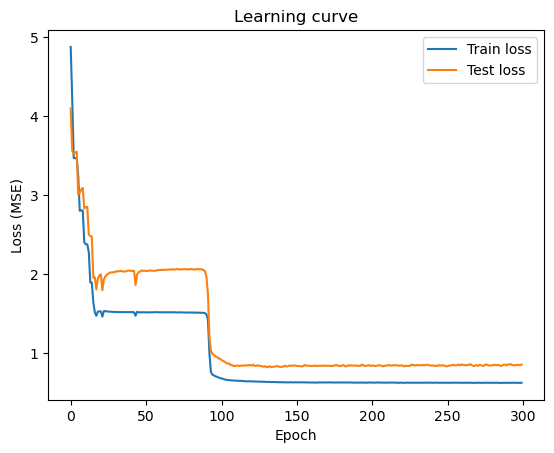

In [38]:
plt.plot([element[3] for element in outputs[::]], label='Train loss')
plt.plot([element[4] for element in outputs[::]], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning curve')
plt.legend()
plt.show()

### The architecture actually used for sampling

In [39]:
class Autoencoder_age(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(1 * 16, 1 * 6),
            nn.ReLU(),
            nn.Linear(1 * 6, 1 * 2)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(1 * 2, 1 * 6),
            nn.ReLU(),
            nn.Linear(1 * 6, 1 * 16),
            nn.ReLU()
        )
        
    def encode(self, x):
        return self.encoder(x)

    def decode(self, y):
        return nn.functional.normalize(input=self.decoder(y)[0], p=1)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = nn.functional.normalize(input=self.decoder(encoded)[0], p=1)
        return decoded

In [40]:
age_model = Autoencoder_age()
age_model.load_state_dict(torch.load('models/model_for_age_L1_2D_addit_layer_29_08.txt', weights_only=True))
age_model.double()

Autoencoder_age(
  (encoder): Sequential(
    (0): Linear(in_features=16, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=16, bias=True)
    (3): ReLU()
  )
)

### The comparison of two models

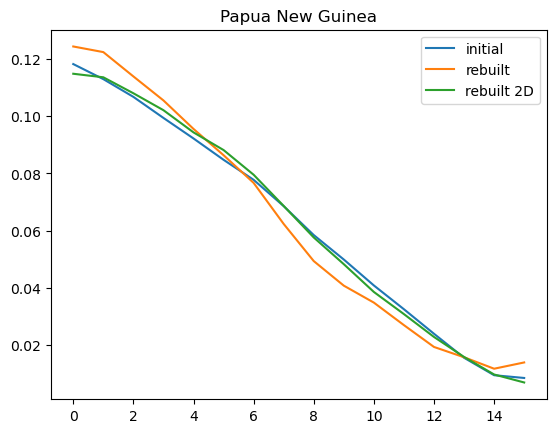

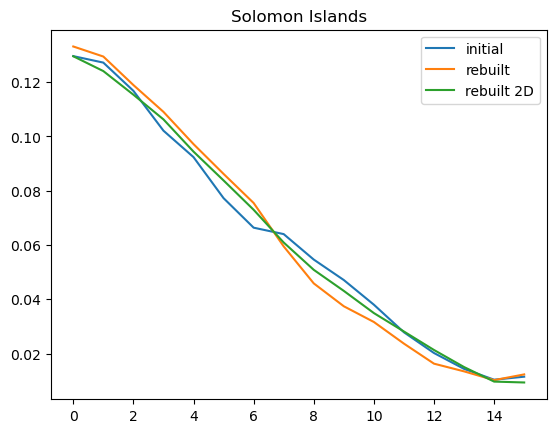

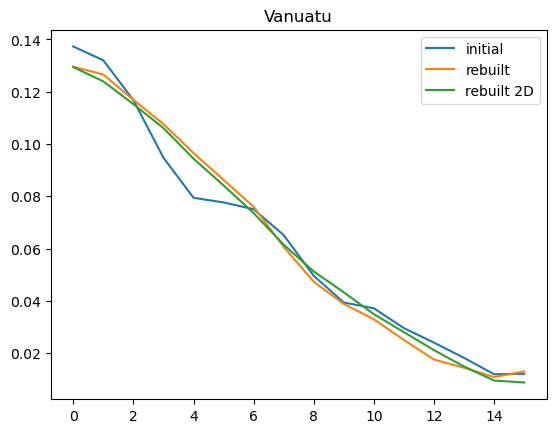

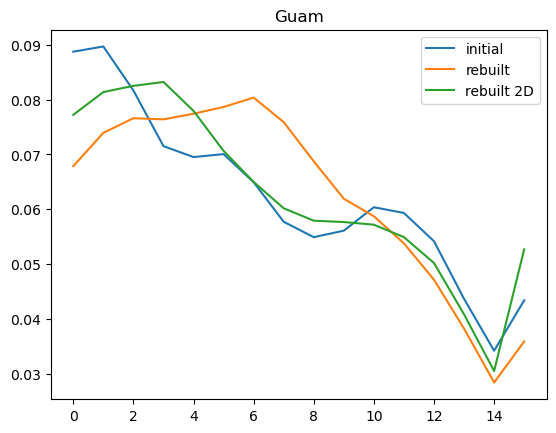

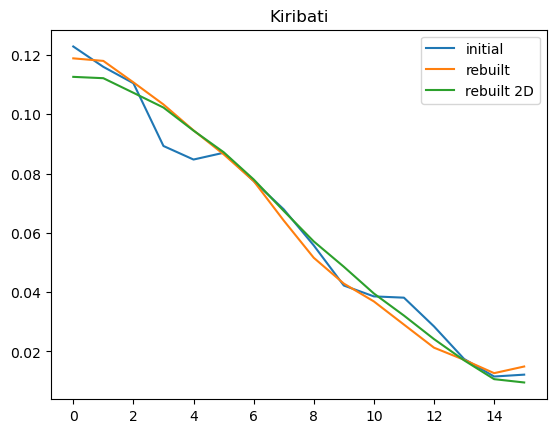

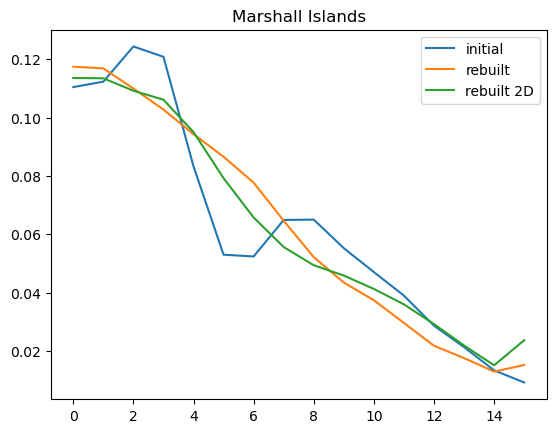

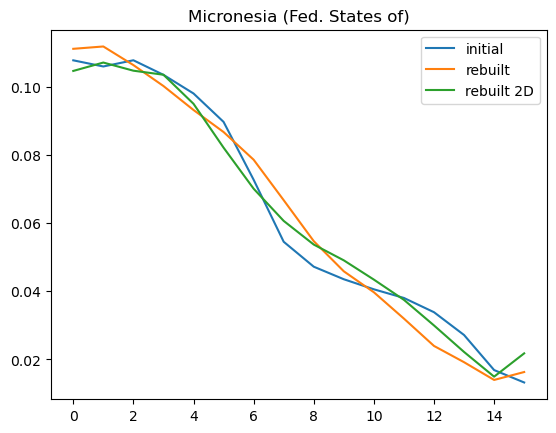

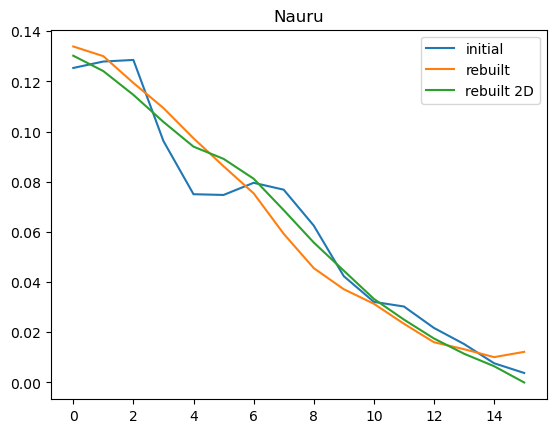

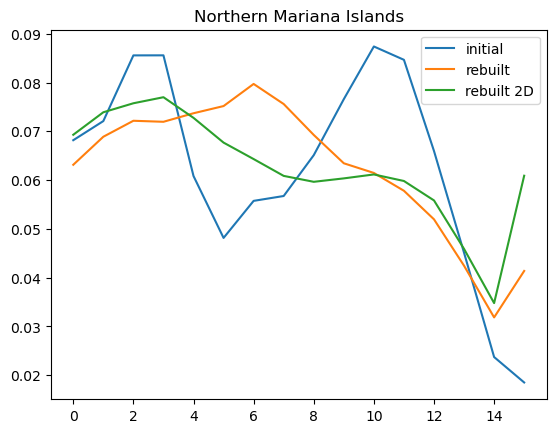

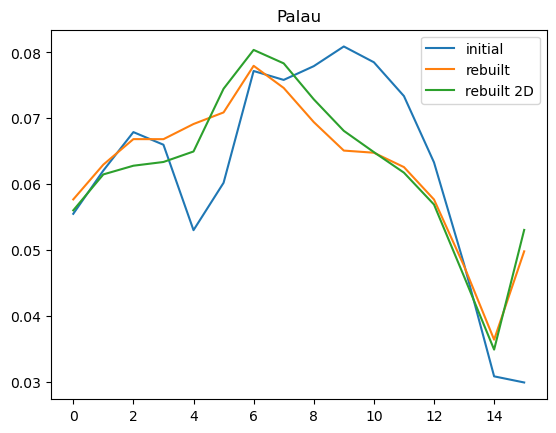

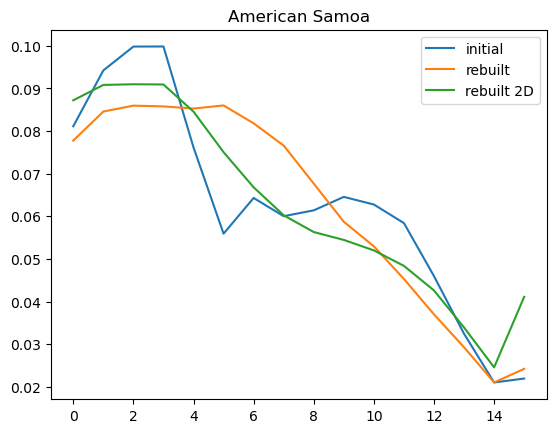

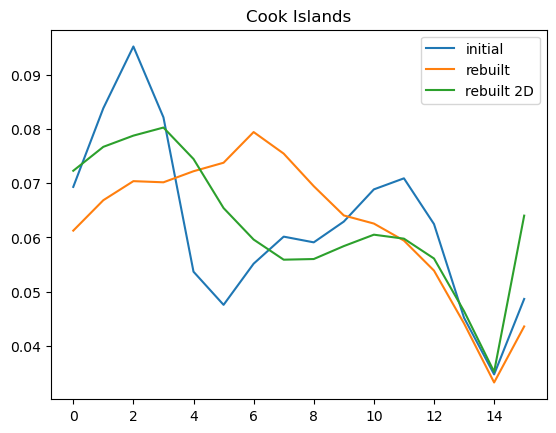

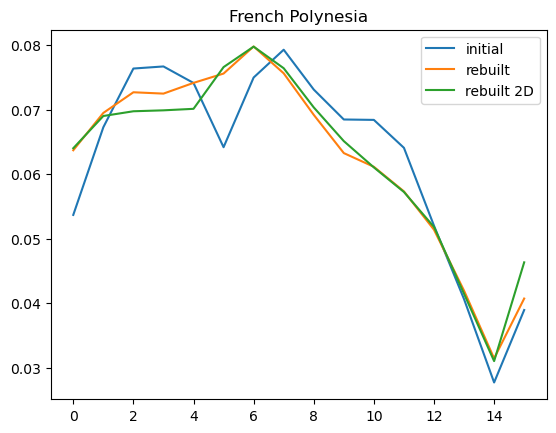

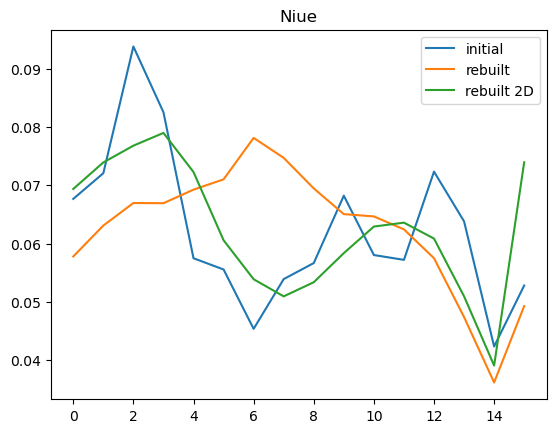

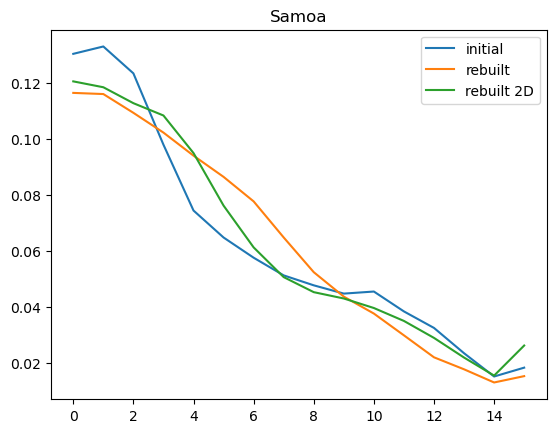

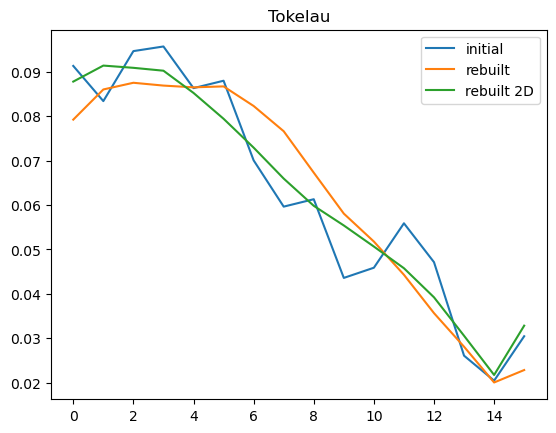

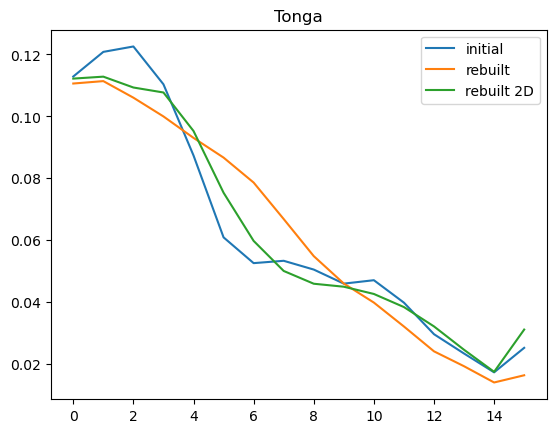

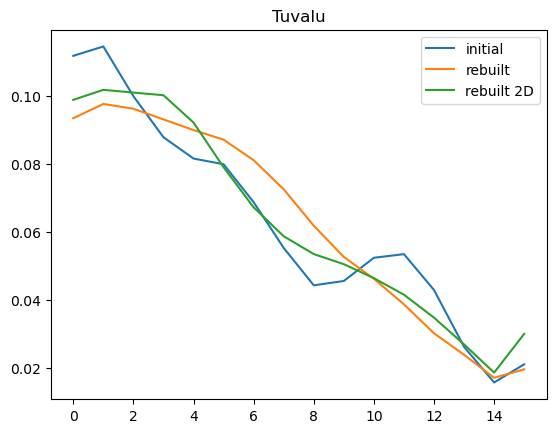

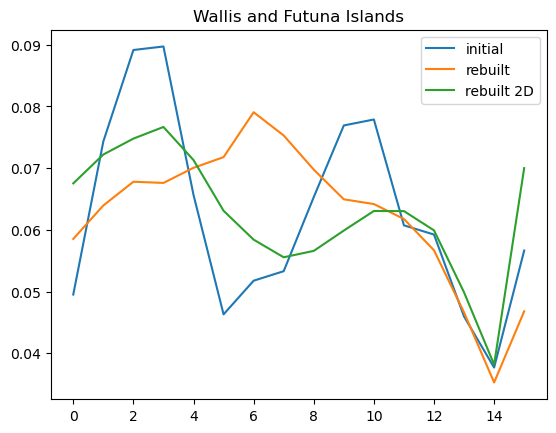

In [41]:
for name in new_names[160::]:
    plt.plot(learn_dict[name].detach().numpy()[0][0], label='initial')
    plt.plot(model(learn_dict[name]).detach().numpy()[0], label='rebuilt')
    plt.plot(age_model(learn_dict[name]).detach().numpy()[0], label='rebuilt 2D')
    plt.legend()
    plt.title(name)
    plt.show()

### Inferring the bounds for sampling region

In [42]:
model = Autoencoder_age()
model.load_state_dict(torch.load('models/model_for_age_L1_2D_addit_layer_29_08.txt'))

/tmp/ipykernel_3996392/3969759380.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/model_for_age_L1_2D_addit_layer_29_08.txt'))


<All keys matched successfully>

In [43]:
arr_vectors = [[], []]
for name in new_names:
    encoded = age_model.encode(learn_dict[name])
    arr_vectors[0].append(encoded.detach().numpy()[0][0][0])
    arr_vectors[1].append(encoded.detach().numpy()[0][0][1])
    if arr_vectors[1][-1] > 0.6:
        print(name, arr_vectors[1][-1])

Qatar 0.806771900717019
United Arab Emirates 0.6626924131966659


In [44]:
arr_afr = [[], []]
for name in african_countries:
    encoded = age_model.encode(learn_dict[name])
    arr_afr[0].append(encoded.detach().numpy()[0][0][0])
    arr_afr[1].append(encoded.detach().numpy()[0][0][1])

In [45]:
xcoord = sorted(arr_vectors[0])
ycoord = sorted(arr_vectors[1])

In [46]:
vmin = xcoord[1]
vmax = xcoord[-1]
hmin = ycoord[1]
hmax = ycoord[-8]

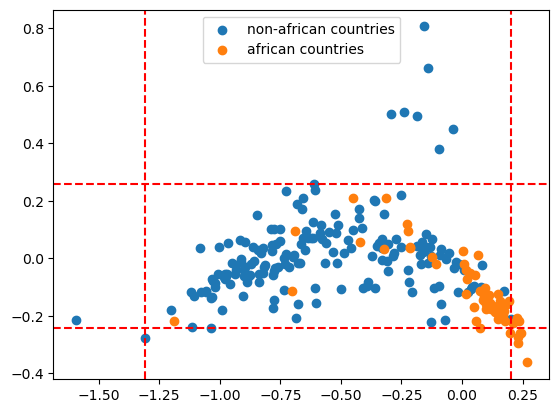

In [47]:
plt.scatter(arr_vectors[0], arr_vectors[1], label='non-african countries')
plt.scatter(arr_afr[0], arr_afr[1], label='african countries')
plt.axvline(x=vmin, linestyle='--', color='red')
plt.axvline(x=vmax, linestyle='--', color='red')
plt.axhline(y=hmin, linestyle='--', color='red')
plt.axhline(y=hmax, linestyle='--', color='red')
plt.legend()
plt.show()

In [48]:
new_arr = [[], []]
for i in range(len(arr_vectors[0])):
    if vmin <= arr_vectors[0][i] <= vmax and hmin <= arr_vectors[1][i] <= hmax:
        new_arr[0].append(arr_vectors[0][i])
        new_arr[1].append(arr_vectors[1][i])

In [49]:
def function(x, a, b, c):
    return a * x ** 2 + b * x + c

In [50]:
from scipy.optimize import curve_fit

In [51]:
param, cov = curve_fit(function, new_arr[0], new_arr[1])

In [52]:
param

array([-0.49611302, -0.48741903, -0.06646047])

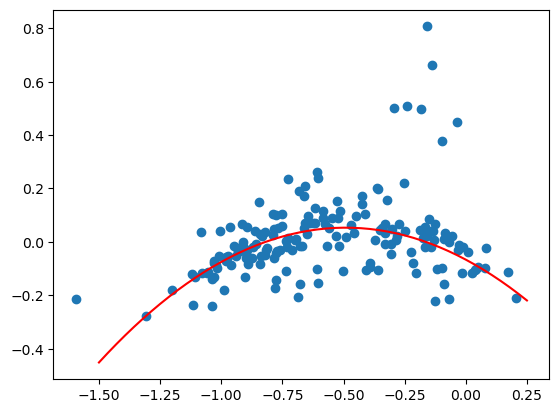

In [53]:
plt.scatter(arr_vectors[0], arr_vectors[1])
x = np.linspace(-1.5, 0.25)
plt.plot(x, [function(point, *param) for point in x], color='red')

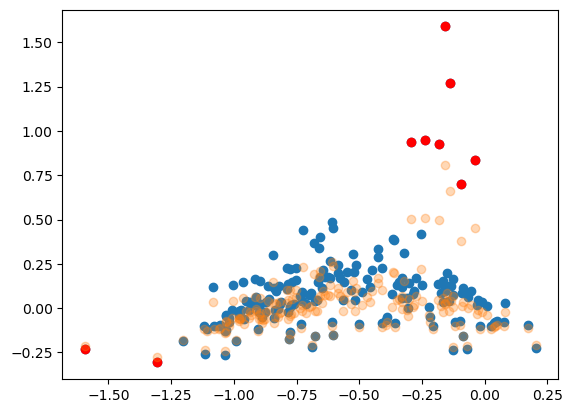

In [54]:
plt.scatter(arr_vectors[0], [point - function(point, *param) for point in arr_vectors[1]])
for i in range(len(arr_vectors[0])):
    if arr_vectors[0][i] not in new_arr[0]:
        plt.scatter([arr_vectors[0][i]], [arr_vectors[1][i] - function(arr_vectors[1][i], *param)], color='red')
plt.scatter(arr_vectors[0], arr_vectors[1], alpha=0.3)

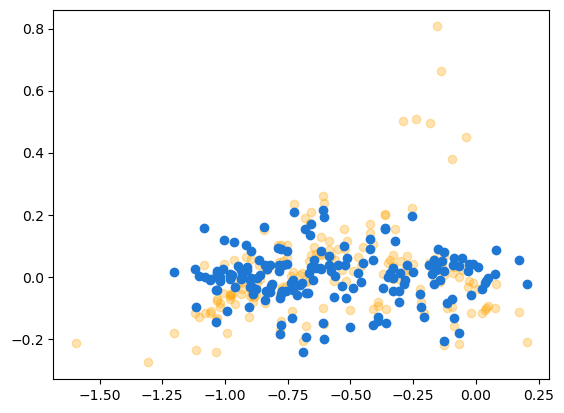

In [55]:
plt.scatter(arr_vectors[0], arr_vectors[1], alpha=0.3, color='orange')
plt.scatter(new_arr[0], [new_arr[1][i] - function(new_arr[0][i], *param) for i in range(len(new_arr[1]))], color='#1f77d4')

In [56]:
final_arr = [new_arr[0], [new_arr[1][i] - function(new_arr[0][i], *param) for i in range(len(new_arr[1]))]]

In [57]:
xcoord = sorted(final_arr[0])
ycoord = sorted(final_arr[1])

In [58]:
vmin = xcoord[0]
vmax = xcoord[-1]
hmin = ycoord[0]
hmax = ycoord[-1]

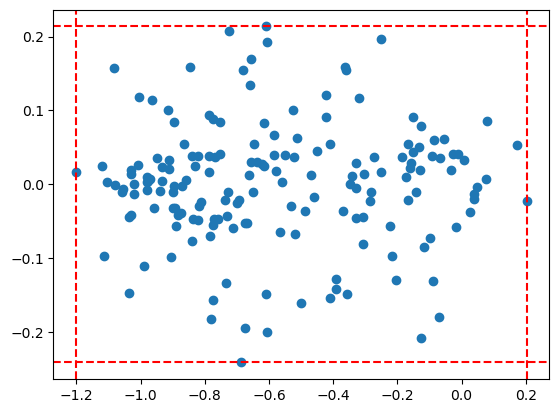

In [59]:
plt.scatter(final_arr[0], final_arr[1])
plt.axvline(x=vmin, linestyle='--', color='red')
plt.axvline(x=vmax, linestyle='--', color='red')
plt.axhline(y=hmin, linestyle='--', color='red')
plt.axhline(y=hmax, linestyle='--', color='red')

### Here they are!

In [60]:
vmin, vmax

(-1.2011979578472443, 0.20369968594883736)

In [61]:
hmin, hmax

(-0.2415954076954021, 0.21363048655827155)